In [31]:
# Usual imports
import pandas as pd
import seaborn as sns
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from phik import phik_matrix
import keras
import tensorflow as tf

%matplotlib inline

# if your Jupyter kernel crashes during this code, use this setting
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

# 

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [32]:
# Read csv file into dataframe
df = pd.read_csv("OneDrive_1_11-20-2024/winter_2022.csv")

df.head()

,ts,airTemp,humidity,dewpoint,precipitation,Friction,Road_Surface_Temperature,Water_Film_Surface_mm
0,2022-11-01 00:05:33,6.5,100.0,6.5,0,0.782107,5.254368,0.075721
1,2022-11-01 00:15:34,6.5,100.0,6.5,0,0.784952,5.220150,0.069520
2,2022-11-01 00:25:34,6.6,100.0,6.6,0,0.786353,5.282785,0.066547
3,2022-11-01 00:35:34,6.6,100.0,6.6,0,0.783228,5.347710,0.073203
4,2022-11-01 00:45:34,6.7,100.0,6.7,0,0.781249,5.426162,0.077464


In [33]:
# Check data statistics
df.describe()

,airTemp,humidity,dewpoint,precipitation,Friction,Road_Surface_Temperature,Water_Film_Surface_mm
count,24585.000000,24585.000000,24585.000000,24585.000000,24585.000000,24585.000000,24585.000000
mean,-1.599549,84.943828,-4.248249,0.781574,0.653365,-0.406302,0.121507
std,5.520545,17.433913,5.365170,1.520350,0.160772,5.078338,0.260198
min,-21.500000,18.000000,-23.600000,0.000000,0.120027,-15.278875,0.000000
25%,-4.800000,81.000000,-7.700000,0.000000,0.533625,-3.004031,0.000000
50%,-1.700000,91.000000,-4.000000,0.000000,0.674662,-0.686799,0.061924
75%,1.500000,97.000000,-0.300000,0.000000,0.820000,1.236727,0.125736
max,17.400000,100.000000,11.100000,6.000000,0.820000,23.930937,5.737984


In [34]:
# Check dataset columns 
df.columns

Index(['ts', 'airTemp', 'humidity', 'dewpoint', 'precipitation', 'Friction',
       'Road_Surface_Temperature', 'Water_Film_Surface_mm'],
      dtype='object')

In [35]:
# No missing values for the merged datasets 
df.isnull().sum()

ts                          0
airTemp                     0
humidity                    0
dewpoint                    0
precipitation               0
Friction                    0
Road_Surface_Temperature    0
Water_Film_Surface_mm       0
dtype: int64

In [36]:
# Check the correleation matrix
df["sequence"] = df.index + 1
df = df.drop("ts", axis = 1)

correlation_matrix = df.corr()
target_corr = correlation_matrix["Friction"].sort_values(ascending=False)
print(target_corr)

Friction                    1.000000
Road_Surface_Temperature    0.470898
airTemp                     0.445015
dewpoint                    0.237932
sequence                    0.055368
precipitation              -0.264252
Water_Film_Surface_mm      -0.282001
humidity                   -0.318333
Name: Friction, dtype: float64


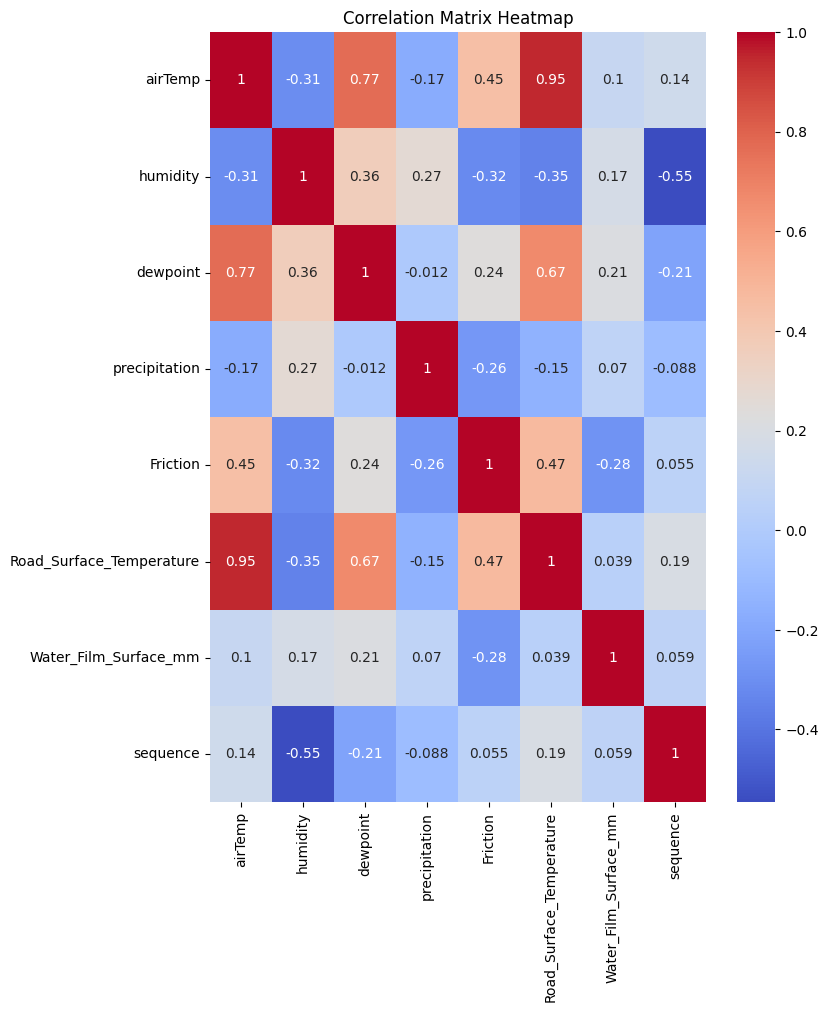

In [37]:
# Visualize the correlation
plt.figure(figsize=(8, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [38]:
# Using MinMax scaler to scale relevant variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Scale only relevant variables
num_cols = ['airTemp', 'humidity', 'dewpoint', 'Friction',
       'Road_Surface_Temperature', 'Water_Film_Surface_mm']
df[num_cols] = scaler.fit_transform(df[num_cols])

df

,airTemp,humidity,dewpoint,precipitation,Friction,Road_Surface_Temperature,Water_Film_Surface_mm,sequence
0,0.719794,1.000000,0.867435,0,0.945865,0.523676,0.013197,1
1,0.719794,1.000000,0.867435,0,0.949930,0.522803,0.012116,2
2,0.722365,1.000000,0.870317,0,0.951931,0.524401,0.011598,3
3,0.722365,1.000000,0.870317,0,0.947466,0.526057,0.012758,4
4,0.724936,1.000000,0.873199,0,0.944639,0.528058,0.013500,5
...,...,...,...,...,...,...,...,...
24580,0.619537,0.853659,0.703170,0,1.000000,0.448790,0.000000,24581
24581,0.616967,0.841463,0.694524,0,1.000000,0.448994,0.000000,24582
24582,0.616967,0.829268,0.691643,0,1.000000,0.442979,0.000000,24583
24583,0.619537,0.817073,0.685879,0,1.000000,0.435267,0.000000,24584


In [39]:
# pip install phik
import phik
import pandas as pd

# compute phik-matrix values
phik_matrix = df.phik_matrix()

phik_matrix

interval columns not set, guessing: ['airTemp', 'humidity', 'dewpoint', 'precipitation', 'Friction', 'Road_Surface_Temperature', 'Water_Film_Surface_mm', 'sequence']


,airTemp,humidity,dewpoint,precipitation,Friction,Road_Surface_Temperature,Water_Film_Surface_mm,sequence
airTemp,1.000000,0.607187,0.927223,0.297272,0.585857,0.945421,0.226370,0.711209
humidity,0.607187,1.000000,0.480538,0.291359,0.375070,0.635537,0.122173,0.654286
dewpoint,0.927223,0.480538,1.000000,0.363384,0.459493,0.878962,0.304851,0.692581
precipitation,0.297272,0.291359,0.363384,1.000000,0.327031,0.332281,0.224455,0.268062
Friction,0.585857,0.375070,0.459493,0.327031,1.000000,0.616073,0.395874,0.742519
Road_Surface_Temperature,0.945421,0.635537,0.878962,0.332281,0.616073,1.000000,0.302677,0.771075
Water_Film_Surface_mm,0.226370,0.122173,0.304851,0.224455,0.395874,0.302677,1.000000,0.303026
sequence,0.711209,0.654286,0.692581,0.268062,0.742519,0.771075,0.303026,1.000000


interval columns not set, guessing: ['airTemp', 'humidity', 'dewpoint', 'precipitation', 'Friction', 'Road_Surface_Temperature', 'Water_Film_Surface_mm', 'sequence']


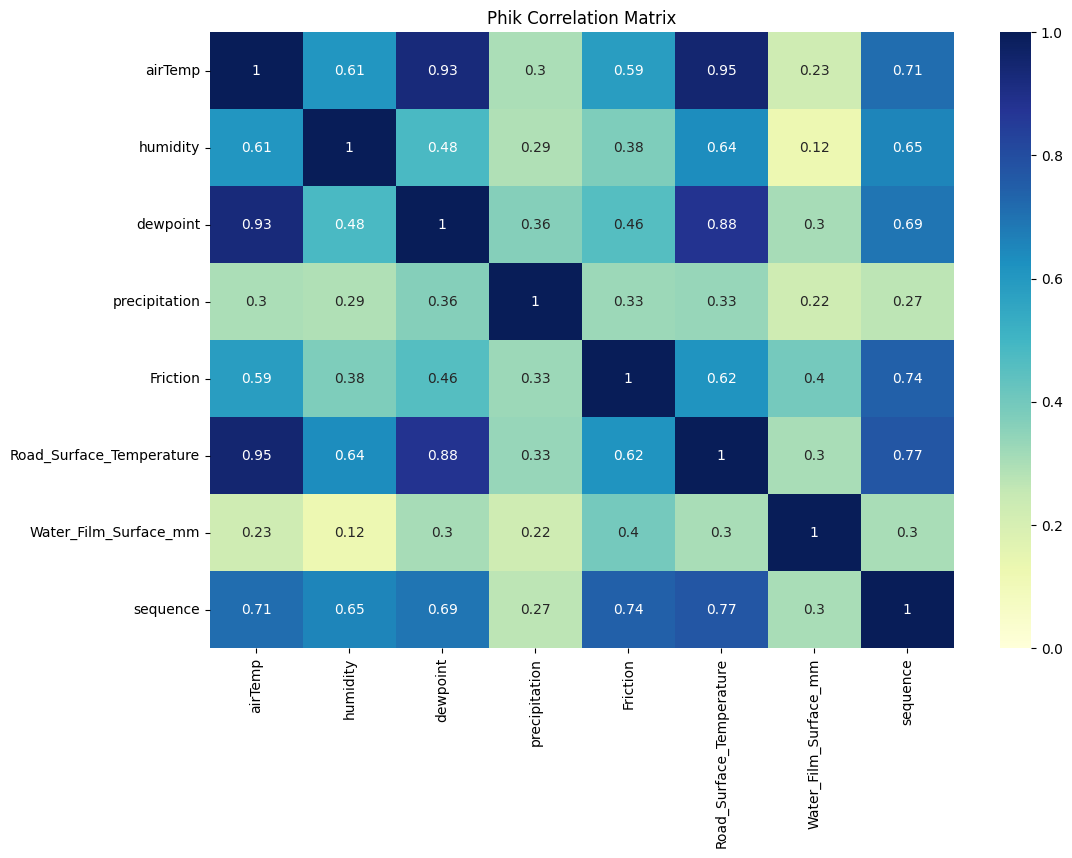

In [40]:
# Compute phik-matrix values
phik_matrix = df.phik_matrix()

# Set up the plot size
plt.figure(figsize=(12, 8))

# Use seaborn's heatmap to plot the matrix
sns.heatmap(phik_matrix, annot=True, cmap="YlGnBu", vmin=0, vmax=1, cbar=True)
plt.title("Phik Correlation Matrix")
plt.show()

In [41]:
# Check the dataframe columns 

df.columns

Index(['airTemp', 'humidity', 'dewpoint', 'precipitation', 'Friction',
       'Road_Surface_Temperature', 'Water_Film_Surface_mm', 'sequence'],
      dtype='object')

In [42]:
# Define function to check to cehcek when it's about to snow with the mean threshold 
def create_target_value(row):
    if row['Friction'] <= 0.5:
        return 1
    else:
        return 0
    
df['target'] = df.apply(create_target_value, axis = 1)

In [43]:
# Check the target values counts 
df['target'].value_counts()

target
0    20851
1     3734
Name: count, dtype: int64

In [44]:
# Remove the last 12 target variables value to predict it with the model
df['target'] = df['target'].shift(periods=-12)

df

,airTemp,humidity,dewpoint,precipitation,Friction,Road_Surface_Temperature,Water_Film_Surface_mm,sequence,target
0,0.719794,1.000000,0.867435,0,0.945865,0.523676,0.013197,1,0.0
1,0.719794,1.000000,0.867435,0,0.949930,0.522803,0.012116,2,0.0
2,0.722365,1.000000,0.870317,0,0.951931,0.524401,0.011598,3,0.0
3,0.722365,1.000000,0.870317,0,0.947466,0.526057,0.012758,4,0.0
4,0.724936,1.000000,0.873199,0,0.944639,0.528058,0.013500,5,0.0
...,...,...,...,...,...,...,...,...,...
24580,0.619537,0.853659,0.703170,0,1.000000,0.448790,0.000000,24581,NaN
24581,0.616967,0.841463,0.694524,0,1.000000,0.448994,0.000000,24582,NaN
24582,0.616967,0.829268,0.691643,0,1.000000,0.442979,0.000000,24583,NaN
24583,0.619537,0.817073,0.685879,0,1.000000,0.435267,0.000000,24584,NaN


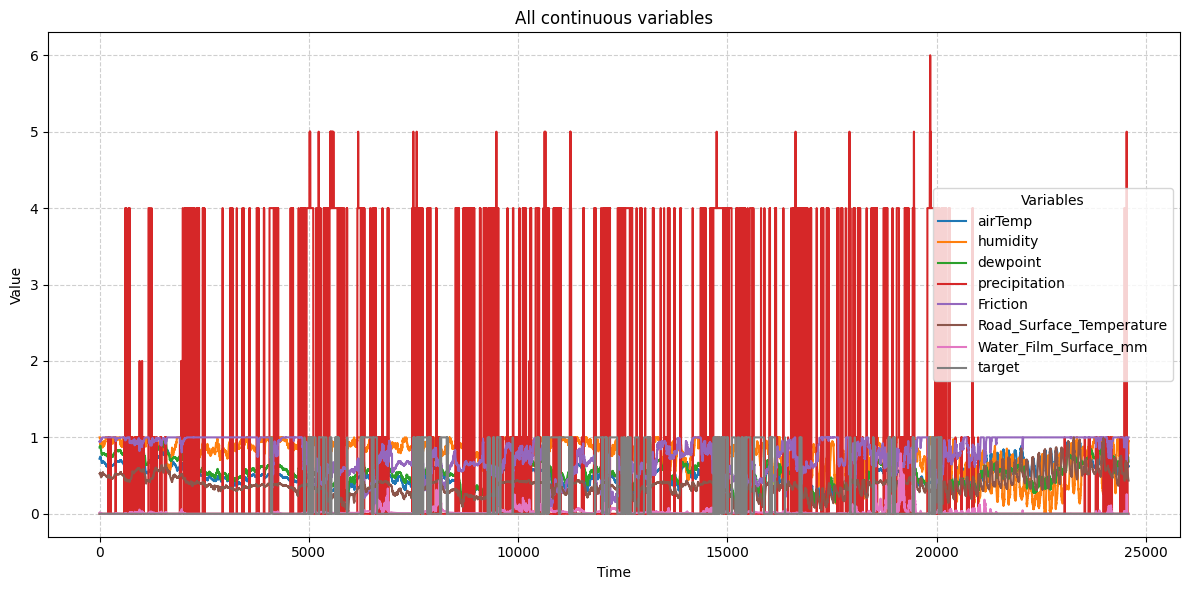

In [45]:
# Plotting the whole variables in a signle graph  
df.set_index("sequence", inplace=True)

plt.figure(figsize=(12, 6))

for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.title("All continuous variables")
plt.xlabel("Time")
plt.ylabel("Value")

plt.legend(title="Variables")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [46]:
# To get the number of variables
n_features = len(num_cols)

In [47]:
from numpy.lib.stride_tricks import sliding_window_view

timestep_size = 50

input_windows = sliding_window_view(df[num_cols].values, window_shape=(timestep_size, n_features))[::timestep_size]

target_windows = sliding_window_view(df['target'].values, window_shape=(timestep_size))[::timestep_size]
targets = target_windows[:,-1]

inputs = input_windows.reshape(-1,timestep_size, n_features)

X= inputs
y = targets

In [48]:
X.shape

(491, 50, 6)

In [49]:
from sklearn.utils import shuffle

X,y = shuffle(X,y, random_state=42)

In [50]:
 # define the cutoff point
train_size = 0.7
splitter = int(len(X) * train_size)

# split to train/test
x_train = X[0:splitter]
x_test = X[splitter:]
y_train = y[0:splitter]
y_test = y[splitter:]

In [51]:
import keras 

def make_model(input_shape):
    model = keras.Sequential(
        [
            # input layer
            keras.layers.Input(input_shape),

            # convolutional layer 1 (we usually have 1-3 convolutional layers
            # depending how much and how complex the data is) -> "model capacity / decision space"
            keras.layers.Conv1D(filters=64, kernel_size=3, padding="same"),
            keras.layers.BatchNormalization(),
            keras.layers.ReLU(),

            # pooling + flatten (adapter from convolutional to dense)
            # flattening is done only once after the final convolutional layer 
            # and before the Dense-network
            keras.layers.GlobalAveragePooling1D(),
            keras.layers.Flatten(),

            # neural network Dense-tail
            keras.layers.Dense(64, activation="relu"),

            # output layer
            keras.layers.Dense(2, activation="softmax")
        ]
    )

    return model


# make the model
model = make_model(input_shape=x_train.shape[1:])

In [52]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model_classifier_22.keras", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
) 

Epoch 1/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.5808 - sparse_categorical_accuracy: 0.6761 - val_loss: 0.5128 - val_sparse_categorical_accuracy: 0.8406 - learning_rate: 0.0010
Epoch 2/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3156 - sparse_categorical_accuracy: 0.8643 - val_loss: 0.4527 - val_sparse_categorical_accuracy: 0.8406 - learning_rate: 0.0010
Epoch 3/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2856 - sparse_categorical_accuracy: 0.8707 - val_loss: 0.4261 - val_sparse_categorical_accuracy: 0.8406 - learning_rate: 0.0010
Epoch 4/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2293 - sparse_categorical_accuracy: 0.9194 - val_loss: 0.4158 - val_sparse_categorical_accuracy: 0.8406 - learning_rate: 0.0010
Epoch 5/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2124 - sparse_categorical_accuracy: 0.9154 - val_loss: 0.4086 - val_sparse_categorical_accuracy: 0.8406 - learning_rate: 0.0010
Epoch 6/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2229

In [53]:
model = keras.models.load_model("best_model_classifier.keras")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2265 - sparse_categorical_accuracy: 0.9090 
Test accuracy 0.9054054021835327
Test loss 0.24563917517662048


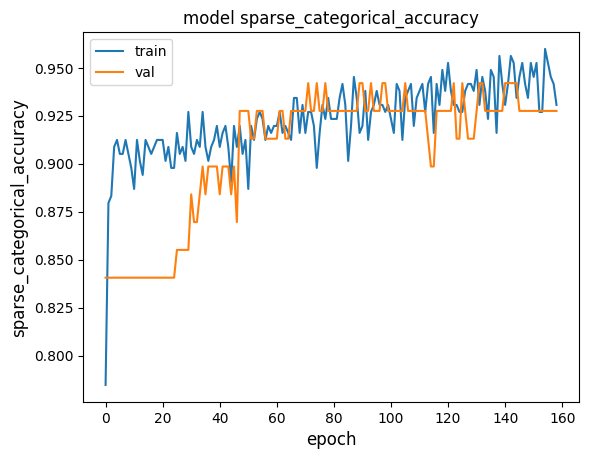

In [54]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

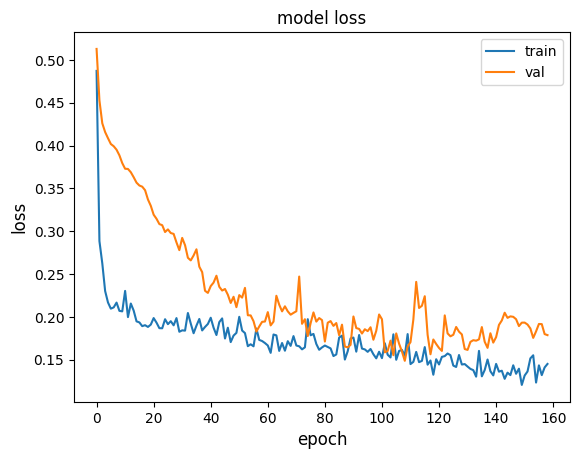

In [55]:
metric = "loss"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [56]:
# get predictions and convert with argmax() to get categories 
# instead of raw probabilities
test_predictions = model.predict(x_test)
test_predictions = np.argmax(test_predictions, axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


<Axes: >

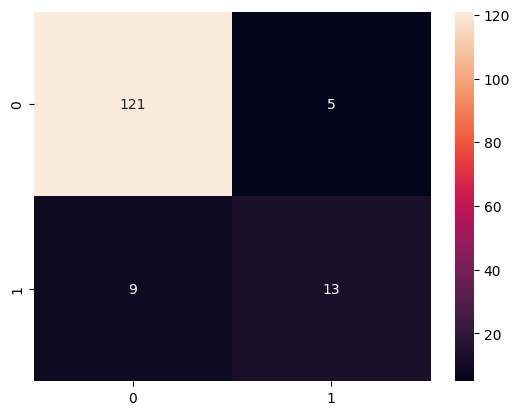

In [57]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g')

# pretty decent, most of the cases of non-slippery
# and slippery was correctly detected

In [58]:
 # print the classification report based on true values and predictions
print(classification_report(y_test, test_predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95       126
         1.0       0.72      0.59      0.65        22

    accuracy                           0.91       148
   macro avg       0.83      0.78      0.80       148
weighted avg       0.90      0.91      0.90       148


Model overall accuracy: 90.54%


In [59]:
# print the ROC AUC -score
roc_auc_score(y_test, model.predict(x_test)[:, 1])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.9321789321789322

In [60]:
suitables = []

# loop through the y-values where it should be target == 1
amount = len(y)

for index in range(amount):
    if y[index] == 1:
        print(f"{index} - {y[index]}")
        suitables.append(index)

5 - 1.0
7 - 1.0
26 - 1.0
30 - 1.0
31 - 1.0
32 - 1.0
53 - 1.0
54 - 1.0
67 - 1.0
68 - 1.0
71 - 1.0
76 - 1.0
77 - 1.0
79 - 1.0
110 - 1.0
116 - 1.0
119 - 1.0
122 - 1.0
124 - 1.0
133 - 1.0
163 - 1.0
184 - 1.0
188 - 1.0
190 - 1.0
192 - 1.0
197 - 1.0
199 - 1.0
206 - 1.0
207 - 1.0
234 - 1.0
243 - 1.0
248 - 1.0
249 - 1.0
260 - 1.0
267 - 1.0
274 - 1.0
275 - 1.0
276 - 1.0
279 - 1.0
288 - 1.0
291 - 1.0
298 - 1.0
309 - 1.0
312 - 1.0
332 - 1.0
335 - 1.0
346 - 1.0
351 - 1.0
355 - 1.0
366 - 1.0
373 - 1.0
386 - 1.0
391 - 1.0
393 - 1.0
405 - 1.0
406 - 1.0
407 - 1.0
408 - 1.0
410 - 1.0
430 - 1.0
441 - 1.0
458 - 1.0
469 - 1.0
470 - 1.0
471 - 1.0
474 - 1.0
479 - 1.0
490 - 1.0
